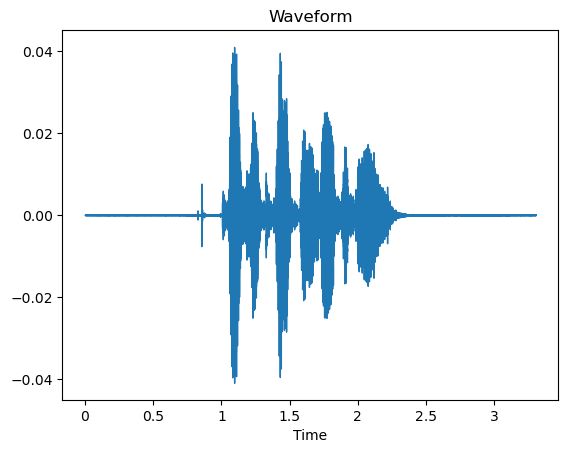

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("C:/Users/Sreyas/Desktop/03-01-01-01-01-01-01.wav")

librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()


In [18]:
import IPython.display as ipd

print("Original Audio:")
ipd.display(ipd.Audio(y, rate=sr))

Original Audio:


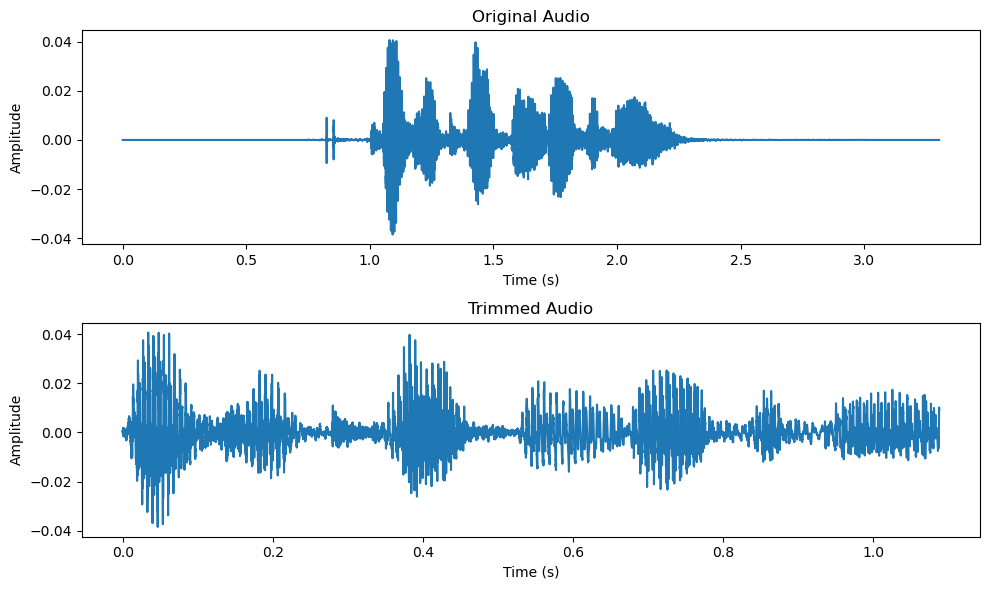

Original Audio:


Trimmed Audio:


In [19]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

original_audio_file = "C:/Users/Sreyas/Desktop/03-01-01-01-01-01-01.wav"
y, sr = librosa.load(original_audio_file, sr=None)

trimmed_y, index = librosa.effects.trim(y, top_db=10)

plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(trimmed_y)) / sr, trimmed_y)
plt.title('Trimmed Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("Original Audio:")
ipd.display(ipd.Audio(y, rate=sr))

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_y, rate=sr))


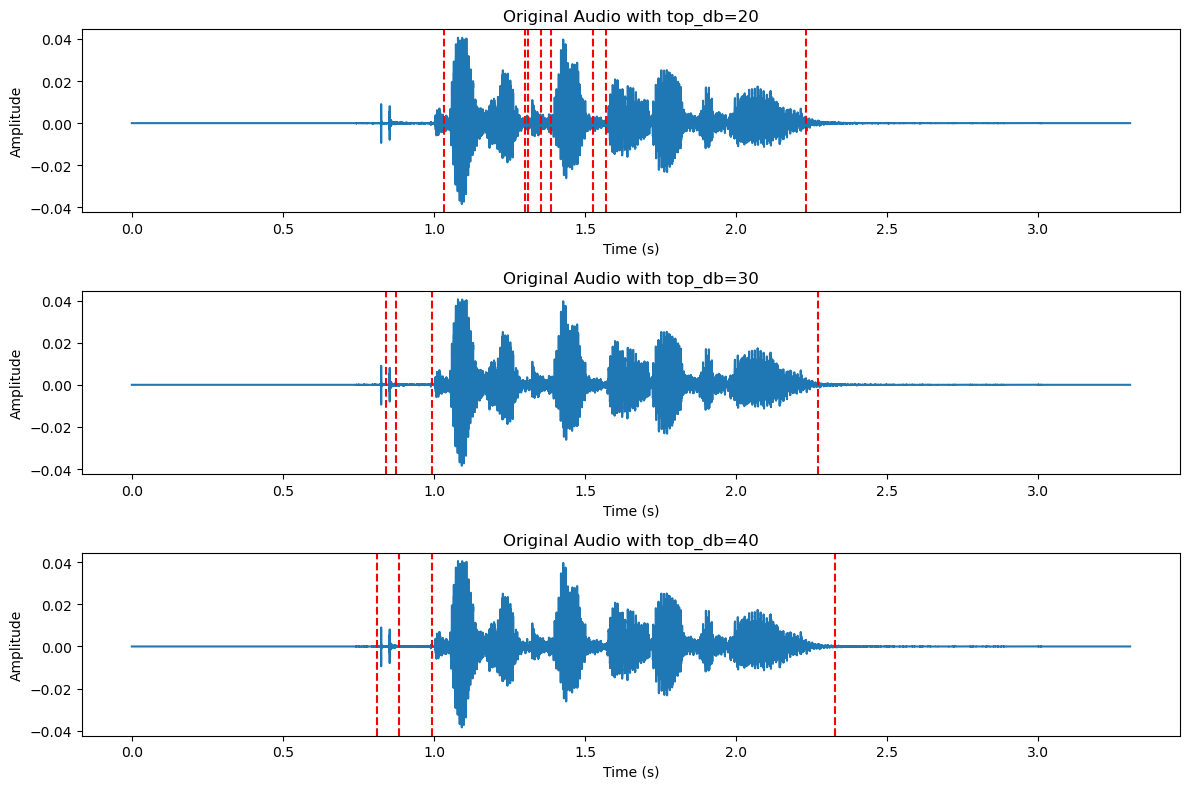

Split Audio with top_db=20:


Split Audio with top_db=30:


Split Audio with top_db=40:


In [20]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

original_audio_file = "C:/Users/Sreyas/Desktop/03-01-01-01-01-01-01.wav"
y, sr = librosa.load(original_audio_file, sr=None)

top_db_values = [20, 30, 40]  # Experiment with different top_db values

plt.figure(figsize=(12, 8))

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    plt.subplot(len(top_db_values), 1, i + 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title(f'Original Audio with top_db={top_db}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    for interval in intervals:
        plt.axvline(interval[0] / sr, color='r', linestyle='--')
        plt.axvline(interval[1] / sr, color='r', linestyle='--')

plt.tight_layout()
plt.show()

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    split_audio = np.concatenate([y[start:end] for start, end in intervals])

    print(f"Split Audio with top_db={top_db}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))


In [21]:
N = 1102 
Ek = [] 
for k in range(len(y)-N+1):
    sum = 0
    for i in range(k,N+k):
        sum += y[i]*y[i]
    Ek.append((1/N)*sum)

In [22]:
import numpy as np
Ek_arr = np.array(Ek)
print(Ek_arr)

[3.38048121e-12 3.38048121e-12 3.38048121e-12 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [23]:
import statistics
Em = []
mean = statistics.mean(Ek_arr)
var = statistics.variance(Ek_arr)
for i in range(len(Ek_arr)):
    Em.append((Ek_arr[i] - mean)/var)
Em_arr = np.array(Em)

In [24]:
print(Em_arr)

[-10375.79359762 -10375.79359762 -10375.79359762 ... -10375.79577391
 -10375.79577391 -10375.79577391]


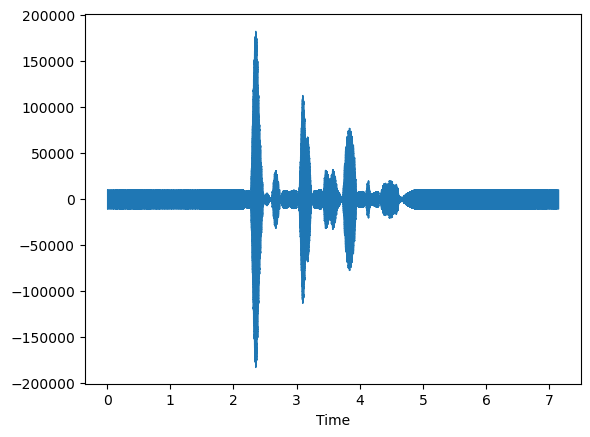

In [25]:
librosa.display.waveshow(Em_arr)

In [26]:
from IPython.display import Audio
Audio(Em_arr,rate = sr)

In [27]:
zero_crossings = librosa.zero_crossings(Em_arr, pad=False)

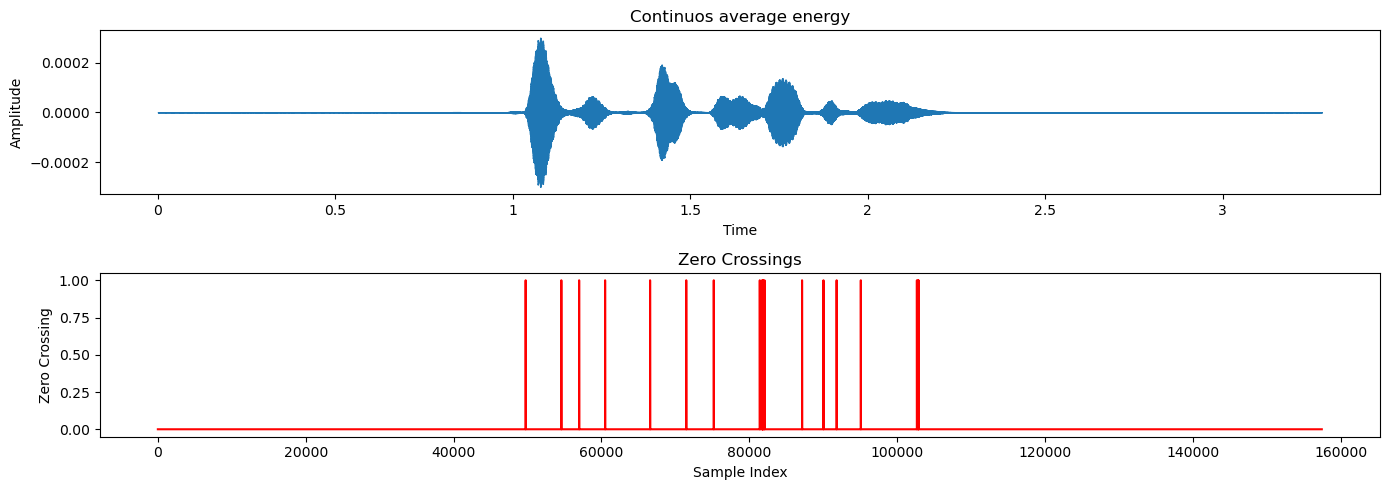

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(Ek_arr, sr=sr)
plt.title('Continuos average energy')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the zero crossings
plt.subplot(2, 1, 2)
plt.plot(zero_crossings, color='r')
plt.title('Zero Crossings')
plt.xlabel('Sample Index')
plt.ylabel('Zero Crossing')
plt.tight_layout()
plt.show()